<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# SP500 Descriptive Analysis Guide


<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

## Purpose

> This code will create a visualization that represents daily volatility of sectors within the S&P500 Index. This Notebook is a guide for how to wrangle and format data in a uniform way so it can be replicated by multiple team members for their assigned sectors within the S&P500 Index. Using the high and low price for the day, calculate the difference(volatility) as a percent. Then get the average volatility for the month. Compare the volatility against the other sectors and evaluate for correlation, divergence and which sectors appear to have the most volatility.

# Import Packages

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.dates as mdates

In [2]:
# Israel Data
sp_materials = pd.read_csv(r"../Data/sp_materials_IG.csv")

In [3]:
sp_utilities = pd.read_csv(r"../Data/sp_utilities_IG.csv")

In [4]:
sp_real_estate = pd.read_csv(r"../Data/sp_real_estate_IG.csv")

# We will all need to meet to work out the details but we are going to try to make the data uniform by selecting the average price on a monthly or yearly basis

### Inspecting the data to see what wrangling needs to be done.

In [5]:
sp_materials.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,05/31/2023,471.02,473.78,474.90,469.18,142.97M,-1.12%
1,05/30/2023,476.37,479.17,479.32,472.87,80.34M,-0.59%
2,05/26/2023,479.21,479.30,482.37,477.26,70.83M,0.42%
3,05/25/2023,477.22,478.85,479.46,474.69,78.10M,-0.38%
4,05/24/2023,479.04,483.45,483.45,478.16,75.35M,-1.12%


In [6]:
sp_materials.tail()

,Date,Price,Open,High,Low,Vol.,Change %
2615,01/08/2013,244.34,243.80,244.80,242.57,NaN,0.18%
2616,01/07/2013,243.90,244.09,244.13,242.56,NaN,-0.20%
2617,01/04/2013,244.39,241.82,244.69,241.82,98.22M,1.18%
2618,01/03/2013,241.55,243.18,243.99,240.79,107.44M,-0.68%
2619,01/02/2013,243.21,238.28,244.05,238.28,133.78M,2.35%


In [7]:
# We have a good 10 years of data for sp_materials

In [8]:
sp_utilities.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,05/31/2023,327.97,325.31,329.35,323.00,182.05M,0.96%
1,05/30/2023,324.86,326.58,328.37,324.47,113.20M,-0.39%
2,05/26/2023,326.13,325.94,326.39,322.96,98.04M,-0.10%
3,05/25/2023,326.45,330.08,330.08,324.25,104.56M,-1.38%
4,05/24/2023,331.01,332.83,333.67,330.48,90.54M,-0.63%


In [9]:
sp_utilities.tail()

,Date,Price,Open,High,Low,Vol.,Change %
2614,01/08/2013,179.45,179.63,179.86,178.76,NaN,-0.18%
2615,01/07/2013,179.78,181.55,181.55,179.61,NaN,-1.14%
2616,01/04/2013,181.86,180.91,181.92,180.89,63.00M,0.54%
2617,01/03/2013,180.88,180.84,181.49,180.42,69.77M,0.00%
2618,01/02/2013,180.88,178.31,181.11,178.31,91.66M,1.81%


In [10]:
# Utilities has 10 years of data

In [11]:
sp_real_estate.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,05/31/2023,225.65,224.55,226.00,222.94,167.82M,0.68%
1,05/30/2023,224.13,225.06,227.10,223.74,61.39M,0.30%
2,05/26/2023,223.45,221.43,223.90,220.49,53.55M,1.18%
3,05/25/2023,220.85,221.39,222.48,219.31,68.33M,0.27%
4,05/24/2023,220.26,224.57,224.61,219.98,56.90M,-2.22%


In [12]:
sp_real_estate.tail()

,Date,Price,Open,High,Low,Vol.,Change %
2613,01/08/2013,153.77,153.92,154.15,153.20,NaN,-0.10%
2614,01/07/2013,153.92,153.52,154.06,153.18,NaN,0.19%
2615,01/04/2013,153.63,152.96,153.67,152.74,33.32M,0.48%
2616,01/03/2013,152.90,153.13,153.73,152.63,39.34M,-0.29%
2617,01/02/2013,153.35,151.38,153.67,151.38,40.61M,1.38%


In [13]:
# Real Estate has 10 years of data

## We will plan on creating 12 data points, one for each month since we are limited by the IT dataset. 
> The end goal will be to show the average difference between the High and Low prices on a percentage basis. We will take the average on a monthly bassis from June 2022 to June 2023.These dates are chosen based on what is available in the IT dataset. With this format applied to each dataset we can merge all of the data together and assess correlation and divergence. 

# Step 1: Wrangle the data

In [14]:
# Here are the wrangline objectives

# We need the Date in numeric format.

# Create a column showing the difference between High and Low as a percent.

# Create a new df with a '_W' at the end to indicate Wrangling with only necesary columns

# Isolate Date range for June 2022 to June 2023

# Parse the Dates 

# Group the data by month and calculate the mean

# Create visualization for individual dataset

In [15]:
# Converting dates to datetime format
sp_materials['Date'] = pd.to_datetime(sp_materials['Date'], format='%m/%d/%Y')
sp_utilities['Date'] = pd.to_datetime(sp_utilities['Date'], format='%m/%d/%Y')
sp_real_estate['Date'] = pd.to_datetime(sp_real_estate['Date'], format='%m/%d/%Y')

### In the Consumer Staples Dataset (CommS) the prices are string Dtype. They must be converted to numeric for calculating the difference. 

In [16]:
# Create Column showing the difference beween the Open and Close price !!!as a percentage!!!
# ** The percent changed is based on the opening price for the session

# All of these columns will eventually be merged so we need to add a suffix to the colunms

sp_materials['diff_sp_mat'] = ((sp_materials['High'] - sp_materials['Low'])/ sp_materials['Low']) * (100)
sp_utilities['diff_sp_utilities'] = ((sp_utilities['High'] - sp_utilities['Low'])/ sp_utilities['Low']) * (100)
sp_real_estate['diff_sp_real_estate'] = ((sp_real_estate['High'] - sp_real_estate['Low'])/ sp_real_estate['Low']) * (100)

### Here we can inspect the changes before moving forward 
> Specifically we are looking at our difference column

> The difference column require a unique ID for the data it represents since we are merging the datasets. The standard naming convention will be 'diff_suffix"

In [17]:
sp_materials.head()

,Date,Price,Open,High,Low,Vol.,Change %,diff_sp_mat
0,2023-05-31,471.02,473.78,474.90,469.18,142.97M,-1.12%,1.219148
1,2023-05-30,476.37,479.17,479.32,472.87,80.34M,-0.59%,1.364011
2,2023-05-26,479.21,479.30,482.37,477.26,70.83M,0.42%,1.070695
3,2023-05-25,477.22,478.85,479.46,474.69,78.10M,-0.38%,1.004866
4,2023-05-24,479.04,483.45,483.45,478.16,75.35M,-1.12%,1.106324


In [18]:
sp_utilities.head()

,Date,Price,Open,High,Low,Vol.,Change %,diff_sp_utilities
0,2023-05-31,327.97,325.31,329.35,323.00,182.05M,0.96%,1.965944
1,2023-05-30,324.86,326.58,328.37,324.47,113.20M,-0.39%,1.201960
2,2023-05-26,326.13,325.94,326.39,322.96,98.04M,-0.10%,1.062051
3,2023-05-25,326.45,330.08,330.08,324.25,104.56M,-1.38%,1.797995
4,2023-05-24,331.01,332.83,333.67,330.48,90.54M,-0.63%,0.965263


In [19]:
sp_real_estate.head()

,Date,Price,Open,High,Low,Vol.,Change %,diff_sp_real_estate
0,2023-05-31,225.65,224.55,226.00,222.94,167.82M,0.68%,1.372567
1,2023-05-30,224.13,225.06,227.10,223.74,61.39M,0.30%,1.501743
2,2023-05-26,223.45,221.43,223.90,220.49,53.55M,1.18%,1.546555
3,2023-05-25,220.85,221.39,222.48,219.31,68.33M,0.27%,1.445443
4,2023-05-24,220.26,224.57,224.61,219.98,56.90M,-2.22%,2.104737


## Now we are creating our wrangled dataframe with '_W' suffix.
> This dataset will be trimmed down containing only necessary data for the analysis.

In [20]:
sp_materials_W = sp_materials[['Date', 'diff_sp_mat']]
sp_utilities_W = sp_utilities[['Date', 'diff_sp_utilities']]
sp_real_estate_W = sp_real_estate[['Date','diff_sp_real_estate']]

In [21]:
#### Take a look and make sure this is correct

In [22]:
sp_materials_W.head(2)

,Date,diff_sp_mat
0,2023-05-31,1.219148
1,2023-05-30,1.364011


In [23]:
sp_utilities_W.head(2)

,Date,diff_sp_utilities
0,2023-05-31,1.965944
1,2023-05-30,1.201960


In [24]:
sp_real_estate_W.head(2)

,Date,diff_sp_real_estate
0,2023-05-31,1.372567
1,2023-05-30,1.501743


## Trim the data down to only June 2022 to June 2023

In [25]:
# Assign the start and end dates we want to filter as a variable
start_date = pd.to_datetime('2018-06-01')
end_date = pd.to_datetime('2023-05-30')

In [26]:
# Use stand and end dates to trim the data for the desired uniform dates. 
sp_materials_W = sp_materials_W[(sp_materials_W['Date'] >= start_date) & (sp_materials_W['Date'] <= end_date)]

In [27]:
# Use stand and end dates to trim the data for the desired uniform dates. 
sp_utilities_W = sp_utilities_W[(sp_utilities_W['Date'] >= start_date) & (sp_utilities_W['Date'] <= end_date)]

In [28]:
# Use stand and end dates to trim the data for the desired uniform dates. 
sp_real_estate_W = sp_real_estate_W[(sp_real_estate_W['Date'] >= start_date) & (sp_real_estate_W['Date'] <= end_date)]

### sp_materials- Parse dates, calcuate mean, and generate visualization

In [29]:
# Extract year and month
sp_materials_W['year_month'] = sp_materials_W['Date'].dt.strftime('%Y-%m')
#sp_materials_W.loc[:, 'year_month'] = sp_materials_W['Date'].dt.strftime('%Y-%m'), can avoid potential errors in the future

In [30]:
sp_materials_W.head(2)

,Date,diff_sp_mat,year_month
1,2023-05-30,1.364011,2023-05
2,2023-05-26,1.070695,2023-05


In [31]:
# Group the data by month and get the mean of the daily percent

sp_materials_mean = sp_materials_W.groupby('year_month')['diff_sp_mat'].mean()

In [32]:
# resetting the index corrects index to maintain column name integrity.
sp_materials_mean = sp_materials_mean.reset_index()
sp_materials_mean.head()

,year_month,diff_sp_mat
0,2018-06,1.177986
1,2018-07,1.072100
2,2018-08,1.109348
3,2018-09,1.010006
4,2018-10,1.916777


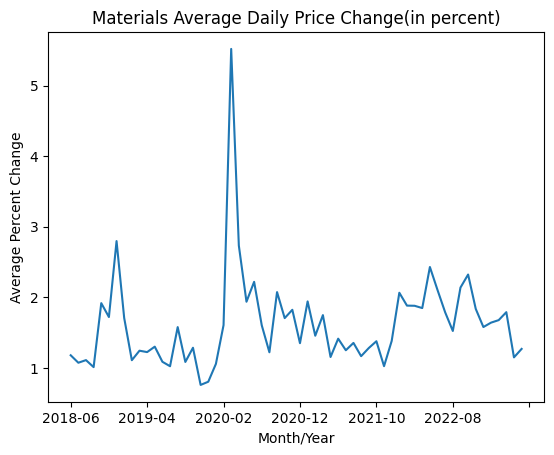

In [33]:
# Set the 'Year' column as the index

sp_materials_mean = sp_materials_mean.reset_index() # resetting the index corrects index to maintain column name integrity.
sp_materials_mean.set_index('year_month', inplace=True) # set_index assigns the date as the X axis

# Plotting the Inflation Data as a line graph
sp_materials_mean['diff_sp_mat'].plot() # This assigns the data to be plotted
plt.xlabel('Month/Year')
plt.ylabel('Average Percent Change')
plt.title('Materials Average Daily Price Change(in percent)')
plt.show()

### IT- Parse dates, calcuate mean, and generate visualization

In [34]:
sp_utilities_W = sp_utilities_W.reset_index()

In [35]:
# Extract year and month
sp_utilities_W['year_month'] = sp_utilities_W['Date'].dt.strftime('%Y-%m')

In [36]:
sp_utilities_W.head(2)

,index,Date,diff_sp_utilities,year_month
0,1,2023-05-30,1.201960,2023-05
1,2,2023-05-26,1.062051,2023-05


In [37]:
# Group the data by month and get the mean of the daily percent

sp_utilities_mean = sp_utilities_W.groupby('year_month')['diff_sp_utilities'].mean()

In [38]:
# resetting the index corrects index to maintain column name integrity.
sp_utilities_mean = sp_utilities_mean.reset_index()
sp_utilities_mean.head()

,year_month,diff_sp_utilities
0,2018-06,1.306953
1,2018-07,1.244638
2,2018-08,1.040203
3,2018-09,1.177992
4,2018-10,1.677990


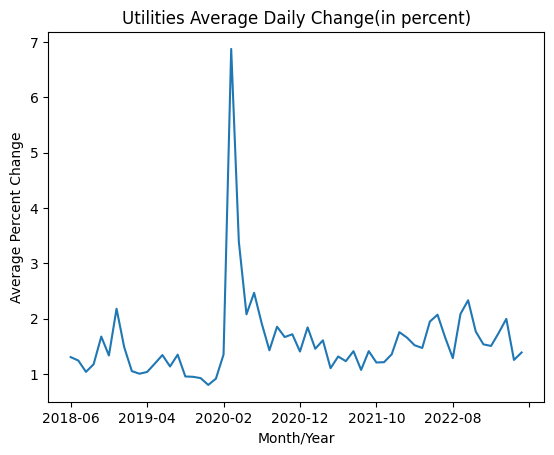

In [39]:
# Set the 'Year' column as the index

sp_utilities_mean = sp_utilities_mean.reset_index() # resetting the index corrects index to maintain column name integrity.
sp_utilities_mean.set_index('year_month', inplace=True) # set_index assigns the date as the X axis

# Plotting the Inflation Data as a line graph
sp_utilities_mean['diff_sp_utilities'].plot() # This assigns the data to be plotted
plt.xlabel('Month/Year')
plt.ylabel('Average Percent Change')
plt.title('Utilities Average Daily Change(in percent)')
plt.show()

### CommS- Parse dates, calcuate mean, and generate visualization

In [40]:
# Extract year and month
sp_real_estate_W['year_month'] = sp_real_estate_W['Date'].dt.strftime('%Y-%m')

In [41]:
sp_real_estate_W.head(2)

,Date,diff_sp_real_estate,year_month
1,2023-05-30,1.501743,2023-05
2,2023-05-26,1.546555,2023-05


In [42]:
# Group the data by month and get the mean of the daily percent

sp_real_estate_mean = sp_real_estate_W.groupby('year_month')['diff_sp_real_estate'].mean()

In [43]:
# resetting the index corrects index to maintain column name integrity.
sp_real_estate_mean = sp_real_estate_mean.reset_index()
sp_real_estate_mean.head()

,year_month,diff_sp_real_estate
0,2018-06,1.057051
1,2018-07,1.108908
2,2018-08,0.896781
3,2018-09,1.024071
4,2018-10,1.706552


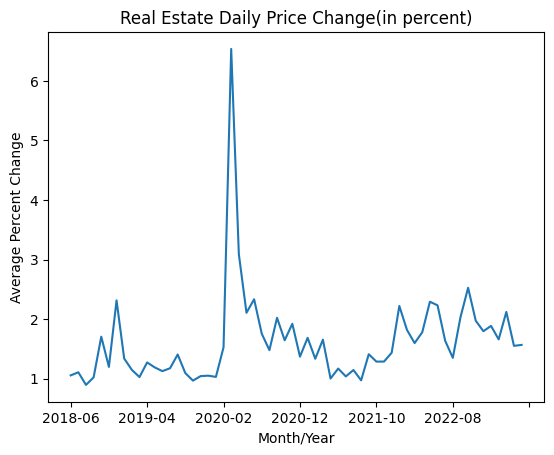

In [44]:
# Set the 'Year' column as the index

sp_real_estate_mean = sp_real_estate_mean.reset_index() # resetting the index corrects index to maintain column name integrity.
sp_real_estate_mean.set_index('year_month', inplace=True) # set_index assigns the date as the X axi

# Plotting the Inflation Data as a line graph
sp_real_estate_mean['diff_sp_real_estate'].plot() # This assigns the data to be plotted
plt.xlabel('Month/Year')
plt.ylabel('Average Percent Change')
plt.title('Real Estate Daily Price Change(in percent)')
plt.show()

# Now we combine the Datasets and put them all in one graph

In [45]:
# Merge materials data and IT data
all_1 = pd.merge(sp_materials_mean, sp_utilities_mean, on='year_month', suffixes=('_mat', '_util'))

In [46]:
# Merge all_1 with Consumer Staples Data
all_2 = pd.merge(all_1, sp_real_estate_mean, on='year_month',suffixes=('_all_1', '_RE'))

In [47]:
all_2.head()

,index_mat,diff_sp_mat,index_util,diff_sp_utilities,index,diff_sp_real_estate
year_month,,,,,,
2018-06,0,1.177986,0,1.306953,0,1.057051
2018-07,1,1.072100,1,1.244638,1,1.108908
2018-08,2,1.109348,2,1.040203,2,0.896781
2018-09,3,1.010006,3,1.177992,3,1.024071
2018-10,4,1.916777,4,1.677990,4,1.706552


In [90]:
# Select only necessary columnns for analysis
all_3 = all_2[['diff_sp_mat','diff_sp_utilities', 'diff_sp_real_estate']]

## Notice when all_3 is called without .reset_index() the year_month column is indexed properly with the other column names. 
> If you run all_3.columns 'year_month' will not display as a column name. Running .reset_index() remedies this

In [85]:

all_3

,diff_sp_mat,diff_sp_utilities,diff_sp_real_estate
year_month,,,
2018-06,1.177986,1.306953,1.057051
2018-07,1.072100,1.244638,1.108908
2018-08,1.109348,1.040203,0.896781
2018-09,1.010006,1.177992,1.024071
2018-10,1.916777,1.677990,1.706552
2018-11,1.719855,1.336395,1.198654
2018-12,2.796332,2.180720,2.315489
2019-01,1.706024,1.487145,1.339271
2019-02,1.108082,1.053893,1.149560


In [50]:
all_3.columns

Index(['diff_sp_mat', 'diff_sp_utilities', 'diff_sp_real_estate'], dtype='object')

In [93]:
all_3 = all_3.reset_index()
all_3.to_csv("../Data/all_3_Ig.csv", index = False)

In [87]:
all_3.head()

,year_month,diff_sp_mat,diff_sp_utilities,diff_sp_real_estate
0,2018-06,1.177986,1.306953,1.057051
1,2018-07,1.072100,1.244638,1.108908
2,2018-08,1.109348,1.040203,0.896781
3,2018-09,1.010006,1.177992,1.024071
4,2018-10,1.916777,1.677990,1.706552


In [94]:
merger_3 = pd.read_csv ("../Data/merger_3_IG.csv")
merger_3.head()

,year_month,Price_mat,Price_util,Price
0,2023-05,476.37,324.86,224.13
1,2023-05,476.37,324.86,223.45
2,2023-05,476.37,324.86,220.85
3,2023-05,476.37,324.86,220.26
4,2023-05,476.37,324.86,225.25


# Visualizing the combined data

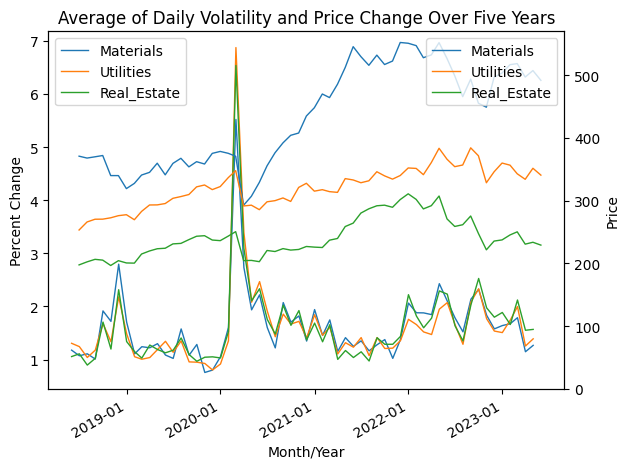

In [114]:
all_3 = all_3.reset_index()
merger_3 = merger_3.reset_index()

# Convert 'year_month' column to Timestamp objects
all_3['year_month'] = pd.to_datetime(all_3['year_month'])
merger_3['year_month'] = pd.to_datetime(merger_3['year_month'])

# Set the 'year_month' column as the index
all_3.set_index('year_month', inplace=True)
merger_3.set_index('year_month', inplace=True)

# Downsampling the merger_3 DataFrame to monthly intervals
merger_3_downsampled = merger_3.resample('M').mean()

# Sort the merger_3 DataFrame by 'year_month' column
merger_3.sort_values('year_month', inplace=True)

# Create the figure and axes
fig, ax1 = plt.subplots()

# Plotting the variables on the primary y-axis
ax1.plot(all_3['diff_sp_mat'], label='Materials', linewidth=1)
ax1.plot(all_3['diff_sp_utilities'], label='Utilities', linewidth=1)
ax1.plot(all_3['diff_sp_real_estate'], label='Real_Estate', linewidth=1)


# Set the labels and title for the primary y-axis
ax1.set_xlabel('Month/Year')
ax1.set_ylabel('Percent Change')
ax1.set_title('Average of Daily Volatility and Price Change Over Five Years')

# Create a secondary y-axis
ax2 = ax1.twinx()

# Plotting the variables on the secondary y-axis
ax2.plot(merger_3_downsampled['Price_mat'], label='Materials', linewidth=1)
ax2.plot(merger_3_downsampled['Price_util'], label='Utilities', linewidth=1)
ax2.plot(merger_3_downsampled['Price'], label='Real_Estate', linewidth=1)

# Set the labels and title for the primary y-axis
ax2.set_ylabel('Price')

# Adjust the y-axis scale for the 'Price' data
ax2.set_ylim(bottom=0)  # Set the minimum y-axis value to 0 or adjust as needed

# Format x-axis labels as desired (e.g., 'YYYY-MM')
date_format = mdates.DateFormatter('%Y-%m')
ax1.xaxis.set_major_formatter(date_format)

# Adjust the appearance of x-axis labels
fig.autofmt_xdate()

# Display the legend for both y-axes
ax1.legend(loc='upper left') 
ax2.legend(loc='upper right')

#Improves layout and spacing of the plot elements
plt.tight_layout()

# Show the plot
plt.show()
